<a href="https://colab.research.google.com/github/ryu45-hu/Submission_Analisis_Sentimen/blob/main/Pelatihan_Model_Analisis_Sentimen_Akhmad_Mustolih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
 !pip freeze > requirements.txt
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.metrics import accuracy_score
 import datetime as dt
 import re
 import string
 from nltk.tokenize import word_tokenize
 from nltk.corpus import stopwords
 !pip install Sastrawi
 from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 import nltk
 nltk.download('punkt')
 nltk.download('stopwords')
 nltk.download('punkt_tab')
 import spacy
 from sklearn.feature_extraction.text import TfidfVectorizer
 from wordcloud import WordCloud, STOPWORDS
 from sklearn.model_selection import train_test_split
 from imblearn.over_sampling import SMOTE
 from sklearn.metrics import accuracy_score
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.svm import SVC
 !pip install gensim numpy==1.24.3 scipy==1.10.1 -q
 !pip install Sastrawi -q
 nltk.download('punkt', quiet=True)
 nltk.download('stopwords', quiet=True)
 nltk.download('punkt_tab', quiet=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
data = pd.read_csv('https://raw.githubusercontent.com/ryu45-hu/Submission_Analisis_Sentimen/refs/heads/main/MyPertamina.csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,014feaa0-9a18-4397-a630-92ed8c769801,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu,5,0,4.6.12,2025-05-30 06:28:33,"Hai, Sobat. Terima kasih telah menggunakan Apl...",2025-05-30 08:10:34,4.6.12
1,34d9d4da-6470-46f5-a1ec-f12290100a02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bintang 1 aja udah kebanyakan.mau tambah kenda...,1,0,4.6.12,2025-05-30 06:20:38,"Hai, Sobat Tulus. Mohon maaf atas ketidaknyama...",2025-05-30 08:11:48,4.6.12
2,533cd4ae-c216-421a-87b0-9e2b8df60a0a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk Tolol!!!!!!!!!!!!!!!,1,0,4.6.12,2025-05-30 05:23:53,NaN,NaN,4.6.12
3,a7aba419-fe80-4e3d-b356-4efad8c90cd0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus sih tp barkode utk pengisian bbm sering ...,4,0,4.6.11,2025-05-30 03:51:39,"Hai, Sobat. Terima kasih telah menggunakan Apl...",2025-05-30 08:15:30,4.6.11
4,e2902804-5a1c-4a00-b315-fe4fd2f1d2bc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantab,5,0,4.6.9,2025-05-30 02:49:10,"Hai, Sobat Siregar. Terima kasih telah menggun...",2025-05-30 08:17:25,4.6.9


In [59]:
num_rows = data.shape[0]
num_cols = data.shape[1]

print(f"jumlah baris: {num_rows}")
print(f"jumlah kolom: {num_cols}")


jumlah baris: 20000
jumlah kolom: 11


In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   userImage             20000 non-null  object
 3   content               19999 non-null  object
 4   score                 20000 non-null  int64 
 5   thumbsUpCount         20000 non-null  int64 
 6   reviewCreatedVersion  16793 non-null  object
 7   at                    20000 non-null  object
 8   replyContent          6610 non-null   object
 9   repliedAt             6610 non-null   object
 10  appVersion            16793 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [61]:
clean_df = data.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'replyContent', 'repliedAt', 'appVersion'], axis=1, errors='ignore')
clean_df.dropna()

,content,score,reviewCreatedVersion,at
0,sangat membantu,5,4.6.12,2025-05-30 06:28:33
1,bintang 1 aja udah kebanyakan.mau tambah kenda...,1,4.6.12,2025-05-30 06:20:38
2,Apk Tolol!!!!!!!!!!!!!!!,1,4.6.12,2025-05-30 05:23:53
3,bagus sih tp barkode utk pengisian bbm sering ...,4,4.6.11,2025-05-30 03:51:39
4,mantab,5,4.6.9,2025-05-30 02:49:10
...,...,...,...,...
19994,Dah isi banyak dgn harapan point dapat banyak ...,1,4.2.3,2023-12-25 03:54:38
19995,Update terossss lg dk kios malah nunggu update...,1,4.2.3,2023-12-25 03:49:53
19996,Oke,4,4.2.3,2023-12-25 03:08:22
19997,Bagus,5,4.2.3,2023-12-25 02:41:58


In [62]:
clean_df = clean_df.drop_duplicates()

num_rows_cleaned = clean_df.shape[0]
num_cols_cleaned = clean_df.shape[1]

print(f"Jumlah baris setelah menghapus duplikat: {num_rows_cleaned}")
print(f"Jumlah kolom setelah menghapus duplikat: {num_cols_cleaned}")

Jumlah baris setelah menghapus duplikat: 20000
Jumlah kolom setelah menghapus duplikat: 4


In [63]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               19999 non-null  object
 1   score                 20000 non-null  int64 
 2   reviewCreatedVersion  16793 non-null  object
 3   at                    20000 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


#**TEXT PREPROCESSING**

In [64]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

In [65]:
def casefoldingText(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
  text = filtered
  return text

In [66]:
def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text


def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [67]:
slangwords = {
    "gk": "gak", "tp": "tapi", "yg": "yang", "krn": "karena",
    "dr": "dari", "klo": "kalau", "sm": "sama", "jd": "jadi",
    "blm": "belum", "sy": "saya", "trs": "terus", "udh": "sudah",
    "dg": "dengan", "dpt": "dapat", "bs": "bisa", "lbh": "lebih",
    "krn": "karena", "hrs": "harus", "tp": "tapi", "sm": "sama"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [68]:
# Memuat model bahasa spaCy
nlp = spacy.load('en_core_web_sm')

# Fungsi tokenisasi dengan spaCy
def tokenizingText_spacy(text):
    doc = nlp(text)  # Proses teks menggunakan spaCy
    return [token.text for token in doc]  # Mengembalikan daftar token

In [69]:
print(clean_df['content'].apply(type).value_counts())

content
<class 'str'>      19999
<class 'float'>        1
Name: count, dtype: int64


In [70]:
clean_df['content'] = clean_df['content'].fillna('').astype(str)

In [71]:
clean_df['text_clean'] = clean_df['content'].fillna('').apply(cleaningText)
clean_df['text_clean'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_clean'] = clean_df['text_clean'].apply(fix_slangwords)
clean_df['text_token'] = clean_df['text_clean'].apply(tokenizingText)
clean_df['text_filtered'] = clean_df['text_token'].apply(filteringText)
clean_df['text_string'] = clean_df['text_filtered'].apply(toSentence)
clean_df['text_stemmed'] = clean_df['text_string'].apply(stemmingText)
display(clean_df.head())

,content,score,reviewCreatedVersion,at,text_clean,text_token,text_filtered,text_string,text_stemmed
0,sangat membantu,5,4.6.12,2025-05-30 06:28:33,sangat membantu,"[sangat, membantu]",[membantu],membantu,bantu
1,bintang 1 aja udah kebanyakan.mau tambah kenda...,1,4.6.12,2025-05-30 06:20:38,bintang aja udah kebanyakanmau tambah kendaraa...,"[bintang, aja, udah, kebanyakanmau, tambah, ke...","[bintang, aja, udah, kebanyakanmau, kendaraan,...",bintang aja udah kebanyakanmau kendaraan bisap...,bintang aja udah kebanyakanmau kendara bisapad...
2,Apk Tolol!!!!!!!!!!!!!!!,1,4.6.12,2025-05-30 05:23:53,apk tolol,"[apk, tolol]","[apk, tolol]",apk tolol,apk tolol
3,bagus sih tp barkode utk pengisian bbm sering ...,4,4.6.11,2025-05-30 03:51:39,bagus sih tapi barkode utk pengisian bbm serin...,"[bagus, sih, tapi, barkode, utk, pengisian, bb...","[bagus, barkode, utk, pengisian, bbm, error]",bagus barkode utk pengisian bbm error,bagus barkode utk isi bbm error
4,mantab,5,4.6.9,2025-05-30 02:49:10,mantab,[mantab],[mantab],mantab,mantab


In [72]:
def contains_emoji(text):
    if not isinstance(text, str):
        return False  # Pastikan hanya memproses string
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Filter dataframe dengan menghapus baris yang memiliki emoji di salah satu kolom
clean_df = clean_df[~clean_df.applymap(lambda x: contains_emoji(x)).any(axis=1)]

In [73]:
clean_df

,content,score,reviewCreatedVersion,at,text_clean,text_token,text_filtered,text_string,text_stemmed
0,sangat membantu,5,4.6.12,2025-05-30 06:28:33,sangat membantu,"[sangat, membantu]",[membantu],membantu,bantu
1,bintang 1 aja udah kebanyakan.mau tambah kenda...,1,4.6.12,2025-05-30 06:20:38,bintang aja udah kebanyakanmau tambah kendaraa...,"[bintang, aja, udah, kebanyakanmau, tambah, ke...","[bintang, aja, udah, kebanyakanmau, kendaraan,...",bintang aja udah kebanyakanmau kendaraan bisap...,bintang aja udah kebanyakanmau kendara bisapad...
2,Apk Tolol!!!!!!!!!!!!!!!,1,4.6.12,2025-05-30 05:23:53,apk tolol,"[apk, tolol]","[apk, tolol]",apk tolol,apk tolol
3,bagus sih tp barkode utk pengisian bbm sering ...,4,4.6.11,2025-05-30 03:51:39,bagus sih tapi barkode utk pengisian bbm serin...,"[bagus, sih, tapi, barkode, utk, pengisian, bb...","[bagus, barkode, utk, pengisian, bbm, error]",bagus barkode utk pengisian bbm error,bagus barkode utk isi bbm error
4,mantab,5,4.6.9,2025-05-30 02:49:10,mantab,[mantab],[mantab],mantab,mantab
...,...,...,...,...,...,...,...,...,...
19995,Update terossss lg dk kios malah nunggu update...,1,4.2.3,2023-12-25 03:49:53,update terossss lg dk kios malah nunggu update...,"[update, terossss, lg, dk, kios, malah, nunggu...","[update, terossss, lg, dk, kios, nunggu, updat...",update terossss lg dk kios nunggu update bangke,update terossss lg dk kios nunggu update bangke
19996,Oke,4,4.2.3,2023-12-25 03:08:22,oke,[oke],[oke],oke,oke
19997,Bagus,5,4.2.3,2023-12-25 02:41:58,bagus,[bagus],[bagus],bagus,bagus
19998,Baru banget semalam isi BBM di salah satu SPBU...,1,NaN,2023-12-25 02:37:15,baru banget semalam isi bbm di salah satu spbu...,"[baru, banget, semalam, isi, bbm, di, salah, s...","[banget, semalam, isi, bbm, salah, spbu, jalan...",banget semalam isi bbm salah spbu jalan pejomp...,banget malam isi bbm salah spbu jalan pejompon...


#**PELABELAN**

In [74]:
def label_by_score(score):
    if score >= 4:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

clean_df['label'] = clean_df['score'].apply(label_by_score)

clean_df

,content,score,reviewCreatedVersion,at,text_clean,text_token,text_filtered,text_string,text_stemmed,label
0,sangat membantu,5,4.6.12,2025-05-30 06:28:33,sangat membantu,"[sangat, membantu]",[membantu],membantu,bantu,Positif
1,bintang 1 aja udah kebanyakan.mau tambah kenda...,1,4.6.12,2025-05-30 06:20:38,bintang aja udah kebanyakanmau tambah kendaraa...,"[bintang, aja, udah, kebanyakanmau, tambah, ke...","[bintang, aja, udah, kebanyakanmau, kendaraan,...",bintang aja udah kebanyakanmau kendaraan bisap...,bintang aja udah kebanyakanmau kendara bisapad...,Negatif
2,Apk Tolol!!!!!!!!!!!!!!!,1,4.6.12,2025-05-30 05:23:53,apk tolol,"[apk, tolol]","[apk, tolol]",apk tolol,apk tolol,Negatif
3,bagus sih tp barkode utk pengisian bbm sering ...,4,4.6.11,2025-05-30 03:51:39,bagus sih tapi barkode utk pengisian bbm serin...,"[bagus, sih, tapi, barkode, utk, pengisian, bb...","[bagus, barkode, utk, pengisian, bbm, error]",bagus barkode utk pengisian bbm error,bagus barkode utk isi bbm error,Positif
4,mantab,5,4.6.9,2025-05-30 02:49:10,mantab,[mantab],[mantab],mantab,mantab,Positif
...,...,...,...,...,...,...,...,...,...,...
19995,Update terossss lg dk kios malah nunggu update...,1,4.2.3,2023-12-25 03:49:53,update terossss lg dk kios malah nunggu update...,"[update, terossss, lg, dk, kios, malah, nunggu...","[update, terossss, lg, dk, kios, nunggu, updat...",update terossss lg dk kios nunggu update bangke,update terossss lg dk kios nunggu update bangke,Negatif
19996,Oke,4,4.2.3,2023-12-25 03:08:22,oke,[oke],[oke],oke,oke,Positif
19997,Bagus,5,4.2.3,2023-12-25 02:41:58,bagus,[bagus],[bagus],bagus,bagus,Positif
19998,Baru banget semalam isi BBM di salah satu SPBU...,1,NaN,2023-12-25 02:37:15,baru banget semalam isi bbm di salah satu spbu...,"[baru, banget, semalam, isi, bbm, di, salah, s...","[banget, semalam, isi, bbm, salah, spbu, jalan...",banget semalam isi bbm salah spbu jalan pejomp...,banget malam isi bbm salah spbu jalan pejompon...,Negatif


In [75]:
label_counts = clean_df['label'].value_counts()

label_counts

,count
label,
Negatif,10046
Positif,8215
Netral,854


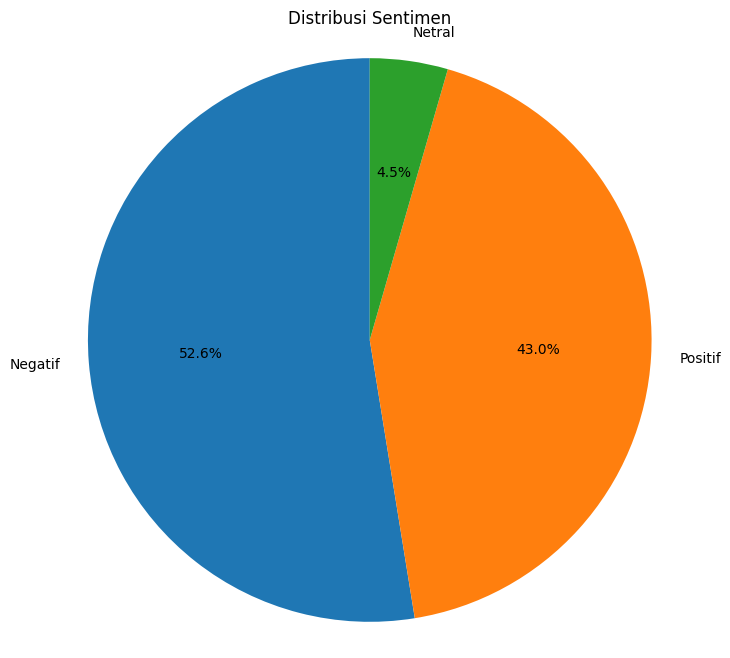

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()

In [77]:

all_text = ' '.join(clean_df['text_stemmed'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)


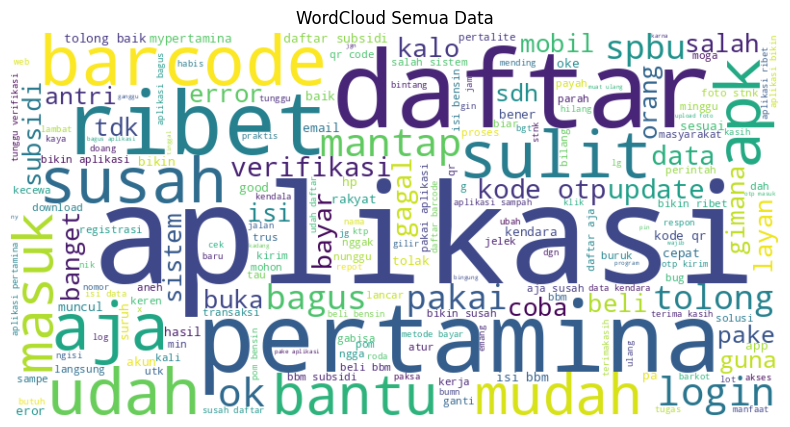

In [78]:
# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud Semua Data')
plt.show()

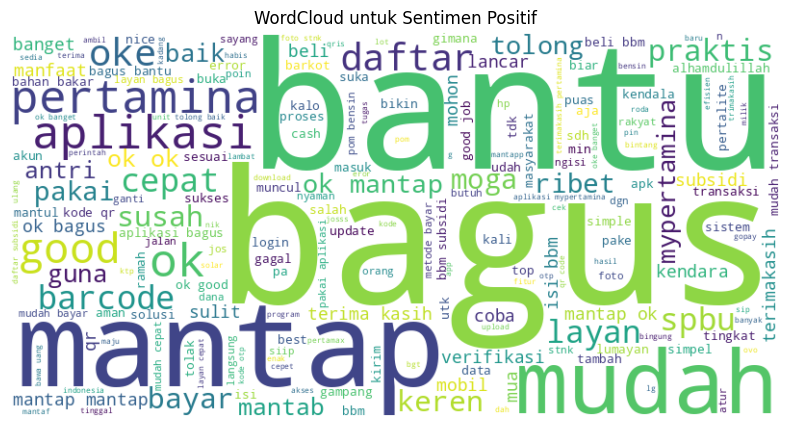

In [79]:
# WordCloud untuk Positive
positive_tweets = clean_df[clean_df['label'] == 'Positif']['text_stemmed']
positive_text = ' '.join(positive_tweets)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Positif')
plt.show()

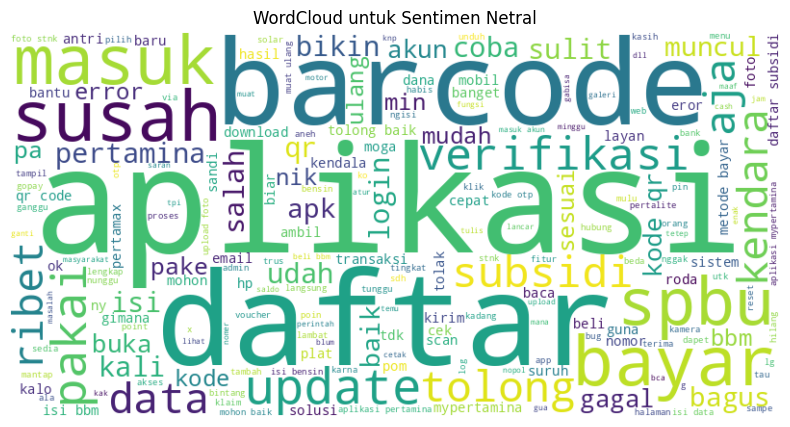

In [80]:
# Netral
neutral_tweets = clean_df[clean_df['label'] == 'Netral']['text_stemmed']
neutral_text = ' '.join(neutral_tweets)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Netral')
plt.show()


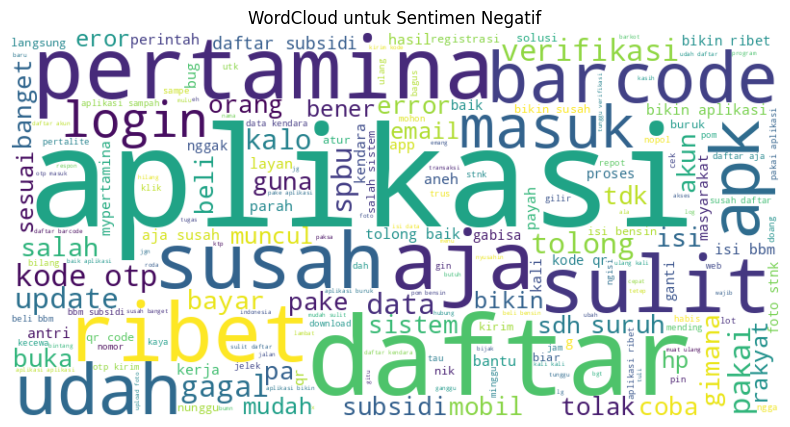

In [81]:
# WordCloud untuk Negative
negative_tweets = clean_df[clean_df['label'] == 'Negatif']['text_stemmed']
negative_text = ' '.join(negative_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud untuk Sentimen Negatif')
plt.show()

##**Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [82]:
X = clean_df['text_stemmed']
y = clean_df['label']

In [83]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95)
X_tfidf = tfidf.fit_transform(X)

In [84]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

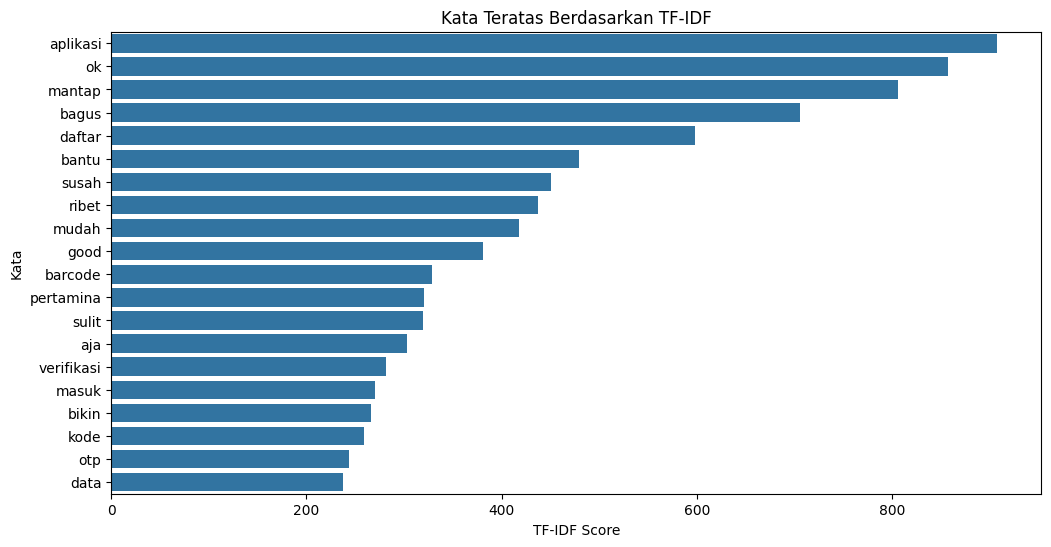

In [85]:
top_words = features_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Kata Teratas Berdasarkan TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Kata')
plt.show()

In [86]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#**Modelling**



##**SVM TFIDF 80:20**

In [87]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print("SVM - Akurasi Training tfidf 80:20:", accuracy_train_svm)
print("SVM - Akurasi Testing tfidf 80:20:", accuracy_test_svm)

SVM - Akurasi Training tfidf 80:20: 0.8214433844877644
SVM - Akurasi Testing tfidf 80:20: 0.7760451227604512


##**RF TFIDF 70:30**

In [88]:
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_tfidf, y)

X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier()
random_forest.fit(X_train_70.toarray(), y_train_70)

RandomForestClassifier()

In [89]:
y_pred_train_rf = random_forest.predict(X_train_70.toarray())
y_pred_test_rf = random_forest.predict(X_test_70.toarray())

In [90]:
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train_70)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test_70)

In [91]:
print("Random Forest - Akurasi Training tfidf 70:30:", accuracy_train_rf)
print("Random Forest - Akurasi Testing tfidf 70:30:", accuracy_test_rf)

Random Forest - Akurasi Training tfidf 70:30: 0.9602768297307547
Random Forest - Akurasi Testing tfidf 70:30: 0.8614244636142446



##**rf Word2Vec 80 :20**

In [92]:
from gensim.models import Word2Vec

# Membuat model Word2Vec
model_w2v = Word2Vec(sentences=clean_df['text_token'], vector_size=100, window=5, min_count=1, workers=4)


# Mengubah teks menjadi fitur Word2Vec
def word2vec_features(tokens):
    return [word for word in tokens if word in model_w2v.wv]

X_word2vec = clean_df['text_token'].apply(word2vec_features)

def average_word2vec(tokens_list):
    valid_tokens = [model_w2v.wv[word] for word in tokens_list if word in model_w2v.wv]
    return np.mean(valid_tokens, axis=0) if valid_tokens else np.zeros(100)

X_word2vec = X_word2vec.apply(average_word2vec)

In [93]:

# Menyiapkan data untuk pelatihan dan pengujian
y = clean_df['label']  # Label sentimen
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec.tolist(), y, test_size=0.2, random_state=42)


# Training dengan RandomForest
rf_model_w2v = RandomForestClassifier()
rf_model_w2v.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier()

In [94]:

# Prediksi dan evaluasi
y_pred_train_rf_w2v = rf_model_w2v.predict(X_train_word2vec)
y_pred_test_rf_w2v = rf_model_w2v.predict(X_test_word2vec)


accuracy_train_rf_w2v = accuracy_score(y_pred_train_rf_w2v, y_train_word2vec)
accuracy_test_rf_w2v = accuracy_score(y_pred_test_rf_w2v, y_test_word2vec)

print("Akurasi Training word2vec:", accuracy_train_rf_w2v)
print("Akurasi Testing word2vec:", accuracy_test_rf_w2v)

Akurasi Training word2vec: 0.9910410672246927
Akurasi Testing word2vec: 0.8396547214229663



#**Inference**

In [95]:
text_uji = ["Pelayanannya sangat ramah dan cepat", "Aplikasi sering error", "Aplikasi sangat jelek"]


# Praproses teks uji
text_uji_clean = [cleaningText(text) for text in text_uji]
text_uji_casefolding = [casefoldingText(text) for text in text_uji_clean]
text_uji_slang = [fix_slangwords(text) for text in text_uji_casefolding]
text_uji_tokenizing = [tokenizingText_spacy(text) for text in text_uji_slang]
text_uji_stopword = [filteringText(text) for text in text_uji_tokenizing]
text_uji_akhir = [toSentence(text) for text in text_uji_stopword]

In [96]:
# Transformasi TF-IDF
text_uji_tfidf = tfidf.transform(text_uji_akhir)

# Prediksi dengan Random Forest
y_pred_uji_rf = random_forest.predict(text_uji_tfidf.toarray())
# Prediksi dengan SVM
y_pred_uji_svm = svm_model.predict(text_uji_tfidf)
# Prediksi dengan RandomForest Word2Vec
text_uji_word2vec = [word2vec_features(text) for text in text_uji_tokenizing]
text_uji_word2vec_avg = [average_word2vec(text) for text in text_uji_word2vec]
y_pred_uji_rf_w2v = rf_model_w2v.predict(text_uji_word2vec_avg)

In [97]:
print("Hasil prediksi Random Forest (TF-IDF):", y_pred_uji_rf)
print("Hasil prediksi SVM (TF-IDF):", y_pred_uji_svm)
print("Hasil prediksi Random Forest (Word2Vec):", y_pred_uji_rf_w2v)

Hasil prediksi Random Forest (TF-IDF): ['Positif' 'Negatif' 'Negatif']
Hasil prediksi SVM (TF-IDF): ['Positif' 'Negatif' 'Negatif']
Hasil prediksi Random Forest (Word2Vec): ['Positif' 'Negatif' 'Negatif']



#**Kesimpulan**

**Terdapat 3 Kesimpulan dan Analisis:**
1. Model Random Forest (TF-IDF 70:30) memberikan hasil yang paling baik dalam hal akurasi testing, yaitu 86.14%, menunjukkan kemampuan model ini untuk mengklasifikasikan sentimen secara lebih akurat pada data yang tidak terlihat.

2. SVM memiliki akurasi lebih rendah, pada training hanya (82.1%) dan testing (77.6%). Ini menunjukkan bahwa SVM cenderung kurang efektif dalam mengklasifikasikan sentimen dibandingkan dengan Random Forest, mungkin karena keberagaman data yang cukup tinggi dan karakteristik non-linear dalam data teks.

3. Random Forest (Word2Vec) memiliki akurasi pelatihan yang sangat tinggi (99.1%), namun menurun pada data testing (83.9%). Hal ini menunjukkan overfitting pada model, di mana model sangat terlatih pada data pelatihan, tetapi tidak mampu menggeneralisasi dengan baik pada data yang baru.